In [16]:
import sys
path = "/Users/usuario/git/sisepuede"
if not path in sys.path:
    sys.path.append(path)
    
import copy
import datetime as dt
import importlib # needed so that we can reload packages
import matplotlib.pyplot as plt
import matplotlib as mpl
import os, os.path
import numpy as np
import pandas as pd
import pathlib
import time
from typing import Union
import warnings
warnings.filterwarnings("ignore")


##  IMPORT SISEPUEDE EXAMPLES AND TRANSFORMERS

from sisepuede.manager.sisepuede_examples import SISEPUEDEExamples
from sisepuede.manager.sisepuede_file_structure import SISEPUEDEFileStructure
import sisepuede.core.support_classes as sc
import sisepuede.transformers as trf
import sisepuede.utilities._plotting as sup
import sisepuede.utilities._toolbox as sf

# temporary fix to avoid rebuilding logger everytime
log_job = None

In [17]:
##  SETUP DIRECTORIES

dir_cur = pathlib.Path(os.getcwd())
dir_data = dir_cur.joinpath("data")
dir_transformations = dir_cur.joinpath("transformations")


##  SETUP FILES

fp_data_base = dir_data.joinpath("mexico_input_fixed.csv")


##  SETUP SOME SISEPUEDE STUFF

file_struct = SISEPUEDEFileStructure()

matt = file_struct.model_attributes
regions = sc.Regions(matt)
time_periods = sc.TimePeriods(matt)

In [20]:
##  BUILD BASE INPUTS

# read in and add time period/region
df_inputs = pd.read_csv(fp_data_base)
df_inputs[regions.key] = "mexico"


# pull example data to fill in gaps
examples = SISEPUEDEExamples()
df_inputs_example = examples.input_data_frame

#  Let's try building transformations using this


In [25]:
transformers = trf.Transformers(
    {},
    df_input = df_inputs,
)



##  Instantiate some transformations CAREFUL NOT TO OVERWRITE EXISTING TRANSFORMATIONS!!

In [27]:
# set an ouput path and instantiate
if not dir_transformations.exists():
    trf.instantiate_default_strategy_directory(
        transformers,
        dir_transformations,
    )


##  --HERE, CUSTOMIZE YOUR TRANSFORMATIONS AND STRATEGIES--
- go to `dir_transformers` and edit config files and `strategy_definitions.csv`
- then, go to next cell

In [78]:
# then, you can load this back in after modifying (play around with it)
transformations = trf.Transformations(
    dir_transformations,
    transformers = transformers,
)
tab = transformations.attribute_transformation.table


In [94]:
#  build the strategies -- will export to path
t0 = time.time()
strategies = trf.Strategies(
    transformations,
    export_path = "transformations",
    prebuild = True,
)

t_elapse = sf.get_time_elapsed(t0)
print(f"Strategies defined at {strategies.transformations.dir_init} initialized in {t_elapse} seconds")


Strategies defined at /Users/usuario/git/sisepuede_region_nbs/mexico/transformations initialized in 2.21 seconds


## we can look at the strategy attributes


In [80]:
# this is an AttributeTable object; need to call the .table property to get a data frame
attr_table = strategies.attribute_table
df_attr_strategies = attr_table.table
df_attr_strategies


,strategy_id,strategy_code,strategy,description,transformation_specification,baseline_strategy_id
0,0,BASE,Strategy TX:BASE,NaN,TX:BASE,1
1,1000,AGRC:DEC_CH4_RICE,Singleton - Default Value - AGRC: Improve rice...,NaN,TX:AGRC:DEC_CH4_RICE,0
2,1001,AGRC:DEC_EXPORTS,Singleton - Default Value - AGRC: Decrease Exp...,NaN,TX:AGRC:DEC_EXPORTS,0
3,1002,AGRC:DEC_LOSSES_SUPPLY_CHAIN,Singleton - Default Value - AGRC: Reduce suppl...,NaN,TX:AGRC:DEC_LOSSES_SUPPLY_CHAIN,0
4,1003,AGRC:INC_CONSERVATION_AGRICULTURE,Singleton - Default Value - AGRC: Expand conse...,NaN,TX:AGRC:INC_CONSERVATION_AGRICULTURE,0
...,...,...,...,...,...,...
64,4005,IPPU:DEC_PFCS,Singleton - Default Value - IPPU: Reduce use o...,NaN,TX:IPPU:DEC_PFCS,0
65,4006,IP:ALL,Sectoral Composite - IPPU,All (unique by transformer) IPPU transformations,TX:IPPU:DEC_CLINKER|TX:IPPU:DEC_DEMAND|TX:IPPU...,0
66,6000,PFLO:INC_HEALTHIER_DIETS,Singleton - Default Value - PFLO: Change diets,NaN,TX:PFLO:INC_HEALTHIER_DIETS,0
67,6001,PFLO:INC_IND_CCS,Singleton - Default Value - PFLO: Industrial c...,NaN,TX:PFLO:INC_IND_CCS,0


In [35]:
strat = strategies.get_strategy(1016)

# to see the dataframe, call 'strat()'--i.e., the function will produce it
df = strat()
df

,strategy_id,pij_lndu_forests_primary_to_croplands,pij_lndu_forests_mangroves_to_wetlands,yf_agrc_nuts_tonne_ha,ef_lndu_conv_forests_secondary_to_other_gg_co2_ha,ef_lndu_conv_forests_secondary_to_wetlands_gg_co2_ha,ef_lndu_conv_other_to_forests_primary_gg_co2_ha,pij_lndu_forests_mangroves_to_forests_secondary,ef_lndu_conv_wetlands_to_settlements_gg_co2_ha,pij_lndu_grasslands_to_forests_secondary,...,nemomod_entc_input_activity_ratio_fuel_production_fp_hydrogen_electrolysis_water,nemomod_entc_input_activity_ratio_fuel_production_fp_hydrogen_reformation_ccs_electricity,energydensity_gravimetric_enfu_gj_per_tonne_fuel_ammonia,energydensity_gravimetric_enfu_gj_per_tonne_fuel_water,frac_trns_fuelmix_water_borne_ammonia,nemomod_entc_output_activity_ratio_fuel_production_fp_ammonia_production_ammonia,nemomod_entc_output_activity_ratio_fuel_production_fp_hydrogen_reformation_ccs_hydrogen,nemomod_entc_frac_min_share_production_fp_hydrogen_reformation_ccs,nemomod_entc_input_activity_ratio_fuel_production_fp_hydrogen_reformation_ccs_natural_gas,nemomod_entc_input_activity_ratio_fuel_production_fp_hydrogen_reformation_ccs_oil
0,1016,0.000000,0.0,1.497014,0.128343,0.129618,0.0,0.0,0.0,0.0,...,0.000004,0,18.6,0.00005,0.0,1,1,0.0,1.315,0.0
1,1016,0.000000,0.0,1.438057,0.128343,0.129618,0.0,0.0,0.0,0.0,...,0.000004,0,18.6,0.00005,0.0,1,1,0.0,1.315,0.0
2,1016,0.000000,0.0,1.435714,0.128343,0.129618,0.0,0.0,0.0,0.0,...,0.000004,0,18.6,0.00005,0.0,1,1,0.0,1.315,0.0
3,1016,0.000016,0.0,1.464529,0.128343,0.129618,0.0,0.0,0.0,0.0,...,0.000004,0,18.6,0.00005,0.0,1,1,0.0,1.315,0.0
4,1016,0.000031,0.0,1.452086,0.128343,0.129618,0.0,0.0,0.0,0.0,...,0.000004,0,18.6,0.00005,0.0,1,1,0.0,1.315,0.0
5,1016,0.000047,0.0,1.452086,0.128343,0.129618,0.0,0.0,0.0,0.0,...,0.000004,0,18.6,0.00005,0.0,1,1,0.0,1.315,0.0
6,1016,0.000063,0.0,1.452086,0.128343,0.129618,0.0,0.0,0.0,0.0,...,0.000004,0,18.6,0.00005,0.0,1,1,0.0,1.315,0.0
7,1016,0.000078,0.0,1.452086,0.128343,0.129618,0.0,0.0,0.0,0.0,...,0.000004,0,18.6,0.00005,0.0,1,1,0.0,1.315,0.0
8,1016,0.000094,0.0,1.452086,0.128343,0.129618,0.0,0.0,0.0,0.0,...,0.000004,0,18.6,0.00005,0.0,1,1,0.0,1.315,0.0
9,1016,0.000110,0.0,1.452086,0.128343,0.129618,0.0,0.0,0.0,0.0,...,0.000004,0,18.6,0.00005,0.0,1,1,0.0,1.315,0.0


In [81]:
transformations.all_transformation_codes

['TX:AGRC:DEC_CH4_RICE',
 'TX:AGRC:DEC_EXPORTS',
 'TX:AGRC:DEC_LOSSES_SUPPLY_CHAIN',
 'TX:AGRC:INC_CONSERVATION_AGRICULTURE',
 'TX:AGRC:INC_PRODUCTIVITY',
 'TX:BASE',
 'TX:CCSQ:INC_CAPTURE',
 'TX:ENTC:DEC_LOSSES',
 'TX:ENTC:LEAST_COST_SOLUTION',
 'TX:ENTC:TARGET_CLEAN_HYDROGEN',
 'TX:ENTC:TARGET_RENEWABLE_ELEC',
 'TX:FGTV:DEC_LEAKS',
 'TX:FGTV:INC_FLARE',
 'TX:INEN:INC_EFFICIENCY_ENERGY',
 'TX:INEN:INC_EFFICIENCY_PRODUCTION',
 'TX:INEN:SHIFT_FUEL_HEAT',
 'TX:IPPU:DEC_CLINKER',
 'TX:IPPU:DEC_DEMAND',
 'TX:IPPU:DEC_HFCS',
 'TX:IPPU:DEC_N2O',
 'TX:IPPU:DEC_OTHER_FCS',
 'TX:IPPU:DEC_PFCS',
 'TX:LNDU:DEC_DEFORESTATION',
 'TX:LNDU:DEC_SOC_LOSS_PASTURES',
 'TX:LNDU:INC_REFORESTATION',
 'TX:LNDU:INC_SILVOPASTURE',
 'TX:LNDU:PLUR',
 'TX:LSMM:INC_CAPTURE_BIOGAS',
 'TX:LSMM:INC_MANAGEMENT_CATTLE_PIGS',
 'TX:LSMM:INC_MANAGEMENT_OTHER',
 'TX:LSMM:INC_MANAGEMENT_POULTRY',
 'TX:LVST:DEC_ENTERIC_FERMENTATION',
 'TX:LVST:DEC_ENTERIC_FERMENTATION_LOWER',
 'TX:LVST:DEC_EXPORTS',
 'TX:LVST:INC_PRODUCTIVIT

# You can test strategies here as combinations of transformations

In [ ]:
# let's just check with AFOLU
import sisepuede.models.afolu as mafl
model_afolu = mafl.AFOLU(matt)


In [82]:
transformations_to_check = [
    'TX:AGRC:INC_CONSERVATION_AGRICULTURE',
    'TX:LNDU:DEC_DEFORESTATION',
    'TX:LNDU:DEC_SOC_LOSS_PASTURES',
    'TX:LNDU:INC_REFORESTATION',
    'TX:LNDU:INC_SILVOPASTURE',
    'TX:LNDU:PLUR',
    'TX:LVST:DEC_ENTERIC_FERMENTATION',
    'TX:PFLO:INC_HEALTHIER_DIETS'
]

transformations_to_check_lower = [
    'TX:AGRC:INC_CONSERVATION_AGRICULTURE',
    'TX:LNDU:DEC_DEFORESTATION',
    'TX:LNDU:DEC_SOC_LOSS_PASTURES',
    'TX:LNDU:INC_REFORESTATION',
    'TX:LNDU:INC_SILVOPASTURE',
    'TX:LNDU:PLUR',
    'TX:LVST:DEC_ENTERIC_FERMENTATION_LOWER',
    'TX:PFLO:INC_HEALTHIER_DIETS'
]


strategy_check = trf.Strategy(
    8000, # id number
    transformations_to_check,
    transformations,
)

strategy_check_lower = trf.Strategy(
    8001, # id number
    transformations_to_check_lower,
    transformations,
)

# create the input dfs
df_input_8000 = strategy_check()
df_input_8001 = strategy_check_lower()


In [89]:
transformer = transformers.get_transformer("TFR:LVST:DEC_ENTERIC_FERMENTATION")
?transformer

Signature:       transformer(*args, **kwargs) -> Any
Type:            Transformer
String form:     <sisepuede.transformers.transformers.Transformer object at 0x13bb827d0>
File:            ~/git/sisepuede/sisepuede/transformers/transformers.py
Docstring:      
Implement the "Reduce Enteric Fermentation" LVST transformer on input DataFrame df_input. 

Transformation Code : 
        TFR:LVST:DEC_ENTERIC_FERMENTATION

Parameters
----------
df_input : pd.DataFrame
    Optional data frame containing trajectories to modify
dict_lvst_reductions : Union[dict, None]
    Dictionary allocating mapping livestock categories to associated reductions in enteric fermentation. If None, defaults to

    {
        "buffalo": 0.4,
        "cattle_dairy": 0.4,
        "cattle_nondairy": 0.4,
        "goats": 0.56,
        "sheep": 0.56
    }

strat : int
    Optional strategy value to specify for the transformation
vec_implementation_ramp : Union[np.ndarray, Dict[str, int], None]
    Optional vector or dict

In [90]:
out_8000 = model_afolu(df_input_8000)
out_8001 = model_afolu(df_input_8001)

In [92]:
out_8000["emission_co2e_subsector_total_lvst"].tail()

31    71.208332
32    68.421434
33    65.709008
34    63.061646
35    60.471855
Name: emission_co2e_subsector_total_lvst, dtype: float64

In [93]:
out_8001["emission_co2e_subsector_total_lvst"].tail()

31    104.801476
32    103.268988
33    101.772125
34    100.298737
35     98.838460
Name: emission_co2e_subsector_total_lvst, dtype: float64

##  Build our templates
- let's use the default variable groupings for LHS

In [15]:
df_vargroups = examples("variable_trajectory_group_specification")

strategies.build_strategies_to_templates(
    df_trajgroup = df_vargroups,
    include_simplex_group_as_trajgroup = True,
    strategies = strategies.all_strategies,#list(range(7101, 7160)),#[0, 6003, 6004, 6005] #+ list(range(7001, 7062)), # list(range(7101, 7160))
)



0

# Finally, load SISEPUEDE so that we can run it

In [95]:
import sisepuede as si

ssp = si.SISEPUEDE(
    "calibrated",
    db_type = "csv",
    #id_str = "sisepuede_run_2024-12-04T13:28:29.811153",
    initialize_as_dummy = True, # no connection to Julia is initialized if set to True
    logger = log_job,
    regions = ["mexico"],
    strategies = strategies,
    try_exogenous_xl_types_in_variable_specification = True,
)
log_job = ssp.logger


2025-02-19 15:08:13,585 - INFO - Successfully initialized SISEPUEDEFileStructure.
2025-02-19 15:08:13,586 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2025-02-19 15:08:13,587 - INFO - 	Setting export engine to 'csv'.
2025-02-19 15:08:13,587 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2025-02-19 15:08:13,587 - INFO - Successfully instantiated table ANALYSIS_METADATA
2025-02-19 15:08:13,588 - WARNING - No index fields found in ATTRIBUTE_DESIGN. Initializing index fields.
2025-02-19 15:08:13,588 - INFO - Successfully instantiated table ATTRIBUTE_DESIGN
2025-02-19 15:08:13,588 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES. Initializing index fields.
2025-02-19 15:08:13,589 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES
2025-02-19 15:08:13,589 - WARNING - No index fi

##  Run this cell to get all AFOLU strategies (crude)

In [109]:
tab = strategies.attribute_table.table
strat_codes = [
    x for x in list(tab["strategy_code"]) if
    ("AGRC" in x)
    or ("FRST" in x)
    or ("LNDU" in x)
    or ("LVST" in x)
    or ("LSMM" in x)
    or ("SOIL" in x)
    or ("AF:" in x)
]
strats_to_run = list(tab[tab["strategy_code"].isin(strat_codes)][strategies.attribute_table.key])
strats_to_run

[1000,
 1001,
 1002,
 1003,
 1004,
 1005,
 1006,
 1007,
 1008,
 1009,
 1010,
 1011,
 1012,
 1013,
 1014,
 1015,
 1016,
 1017,
 1018,
 1019]

In [111]:

# run HEREHERE
dict_scens = {
    ssp.key_design: [0],
    ssp.key_future: [0],
    ssp.key_strategy: strats_to_run ,#list(range(7101, 7160)),#[0, 6003, 6004, 6005],#list(range(7001, 7062)),#
}

#prim_run = [179179]
dict_successful = ssp.project_scenarios(
    dict_scens,
    check_results = False, # spikes
    save_inputs = True,
);


2025-02-19 15:17:19,004 - INFO - 
***	STARTING REGION mexico	***

2025-02-19 15:17:20,606 - INFO - 
***	 REGION mexico COMPLETE	***



In [264]:
"""
tab = ssp.database.db.dict_iterative_database_tables.get("MODEL_INPUT")
inds = tab.fields_index.copy()

tab._initialize_table_indices(
    fields_index = inds,
)



prim_all = ssp.get_primary_keys(
    {
        ssp.key_design: [0],
        ssp.key_future: [0],
        ssp.key_strategy: list(range(7101, 7160)),#[0, 6003, 6004, 6005],
    }
)
prim_run = [x for x in prim_all if x not in list(df_out[ssp.key_primary].unique())]
prim_run

"""

2024-12-08 00:09:57,200 - INFO - Successfully initiatlized available indices from CSV at /Users/usuario/git/sisepuede/sisepuede/out/sisepuede_run_2024-12-07T12;18;10.071663/sisepuede_run_2024-12-07T12;18;10.071663_output_database/MODEL_INPUT.csv


In [126]:
df_out = ssp.read_output(None)
df_in = ssp.read_input(None)

# filter 
df_out.dropna(inplace = True, )
df_in = (
    df_in[
        df_in[ssp.key_primary].isin(
            set(df_out[ssp.key_primary].unique())
        )
    ]
    .reset_index(drop = True)
)

# generate primary id table
df_primary = (
    ssp
    .odpt_primary
    .get_indexing_dataframe(
        sorted(list(df_out[ssp.key_primary].unique()))
    )
)

df_primary_index = pd.merge(
    df_primary,
    strategies.attribute_table.table
)

df_primary_index = df_primary_index.get(
    [
        x for x in df_primary_index.columns if x.endswith("_id")
    ] + [
        "strategy_code",
        "strategy"
    ]
)
    

# optional to write these data back out
if False:
    fp_write = "YOUR_OUTPUT_PATH_HERE"

    df_primary.to_csv(
        os.path.join(fp_write, f"ATTRIBUTE_PRIMARY.csv"),
        index = None,
        encoding = "UTF-8"
    )
    

    df_out.to_csv(
        os.path.join(fp_write, "MODEL_OUTPUT.csv"),
        index = None,
        encoding = "UTF-8",
    )
    
    df_in.to_csv(
        os.path.join(fp_write, "MODEL_INPUT.csv"),
        index = None,
        encoding = "UTF-8",
    )

In [127]:
df_primary_index

,primary_id,design_id,strategy_id,future_id,baseline_strategy_id,strategy_code,strategy
0,1001,0,1000,0,0,AGRC:DEC_CH4_RICE,Singleton - Default Value - AGRC: Improve rice...
1,2002,0,1001,0,0,AGRC:DEC_EXPORTS,Singleton - Default Value - AGRC: Decrease Exp...
2,3003,0,1002,0,0,AGRC:DEC_LOSSES_SUPPLY_CHAIN,Singleton - Default Value - AGRC: Reduce suppl...
3,4004,0,1003,0,0,AGRC:INC_CONSERVATION_AGRICULTURE,Singleton - Default Value - AGRC: Expand conse...
4,5005,0,1004,0,0,AGRC:INC_PRODUCTIVITY,Singleton - Default Value - AGRC: Improve crop...
5,6006,0,1005,0,0,LNDU:DEC_DEFORESTATION,Singleton - Default Value - LNDU: Stop defores...
6,7007,0,1006,0,0,LNDU:DEC_SOC_LOSS_PASTURES,Singleton - Default Value - LNDU: Expand susta...
7,8008,0,1007,0,0,LNDU:INC_REFORESTATION,Singleton - Default Value - LNDU: Increase Ref...
8,9009,0,1008,0,0,LNDU:INC_SILVOPASTURE,Singleton - Default Value - LNDU: Expand silvo...
9,10010,0,1009,0,0,LNDU:PLUR,Singleton - Default Value - LNDU: Partial land...


In [129]:
# look at results for strat 1007 e.g.
df_out[
    df_out['primary_id'].isin([8008])
]

,primary_id,region,time_period,area_agrc_crops_bevs_and_spices,area_agrc_crops_cereals,area_agrc_crops_fibers,area_agrc_crops_fruits,area_agrc_crops_herbs_and_other_perennial_crops,area_agrc_crops_nuts,area_agrc_crops_other_annual,...,yield_agrc_fruits_tonne,yield_agrc_herbs_and_other_perennial_crops_tonne,yield_agrc_nuts_tonne,yield_agrc_other_annual_tonne,yield_agrc_other_woody_perennial_tonne,yield_agrc_pulses_tonne,yield_agrc_rice_tonne,yield_agrc_sugar_cane_tonne,yield_agrc_tubers_tonne,yield_agrc_vegetables_and_vines_tonne
252,8008,mexico,0,1.498417e+06,3.333018e+06,691577.302480,1.802583e+06,2.326069e+06,1.269493e+06,1.679316e+06,...,2.540248e+07,1.309418e+07,1.900449e+06,1.607561e+06,6.286518e+06,2.804834e+06,3.096085e+06,7.575189e+07,1.838938e+07,8.108195e+06
253,8008,mexico,1,1.461591e+06,3.247910e+06,673743.850372,1.753218e+06,2.346959e+06,1.294457e+06,1.515300e+06,...,2.606020e+07,1.293186e+07,1.861503e+06,1.792882e+06,6.304198e+06,2.852284e+06,3.179772e+06,7.525014e+07,1.818125e+07,8.192277e+06
254,8008,mexico,2,1.356992e+06,3.359503e+06,647923.645937,1.676929e+06,1.920247e+06,1.287366e+06,1.436709e+06,...,2.561986e+07,1.573308e+07,1.848289e+06,1.636063e+06,6.338401e+06,2.799054e+06,3.147456e+06,7.488968e+07,1.840122e+07,8.207416e+06
255,8008,mexico,3,1.318551e+06,3.129763e+06,649901.851891,1.706077e+06,1.834059e+06,1.308020e+06,1.347544e+06,...,2.557463e+07,1.397080e+07,1.915632e+06,1.759777e+06,6.602964e+06,2.879428e+06,3.136462e+06,7.539066e+07,1.930299e+07,8.455598e+06
256,8008,mexico,4,1.298439e+06,3.025514e+06,679968.764211,1.709793e+06,1.843056e+06,1.328374e+06,1.348449e+06,...,2.617928e+07,1.336588e+07,1.933932e+06,1.660667e+06,6.725325e+06,2.875121e+06,3.196320e+06,7.791245e+07,1.889613e+07,8.365308e+06
257,8008,mexico,5,1.289893e+06,2.973004e+06,695720.482050,1.715402e+06,1.849896e+06,1.341381e+06,1.352003e+06,...,2.635816e+07,1.346299e+07,1.959783e+06,1.670940e+06,6.615142e+06,2.904469e+06,3.221189e+06,7.832007e+07,1.905386e+07,8.417711e+06
258,8008,mexico,6,1.282017e+06,2.934612e+06,700467.314092,1.713800e+06,1.845480e+06,1.344334e+06,1.349437e+06,...,2.633974e+07,1.343401e+07,1.964560e+06,1.668161e+06,6.523880e+06,2.905252e+06,3.214078e+06,7.792119e+07,1.905446e+07,8.409519e+06
259,8008,mexico,7,1.284250e+06,2.923860e+06,706017.354587,1.722775e+06,1.851750e+06,1.353452e+06,1.355710e+06,...,2.648318e+07,1.348245e+07,1.978295e+06,1.676264e+06,6.509243e+06,2.922157e+06,3.228180e+06,7.806453e+07,1.916511e+07,8.454162e+06
260,8008,mexico,8,1.291399e+06,2.926680e+06,711940.267927,1.736913e+06,1.863201e+06,1.365575e+06,1.366300e+06,...,2.670658e+07,1.356890e+07,1.996468e+06,1.689741e+06,6.532199e+06,2.947036e+06,3.252758e+06,7.847417e+07,1.933017e+07,8.524907e+06
261,8008,mexico,9,1.300936e+06,2.936179e+06,718035.977396,1.753587e+06,1.877164e+06,1.379175e+06,1.379008e+06,...,2.696920e+07,1.367375e+07,2.016818e+06,1.705852e+06,6.573459e+06,2.975824e+06,3.282471e+06,7.901301e+07,1.952191e+07,8.608449e+06


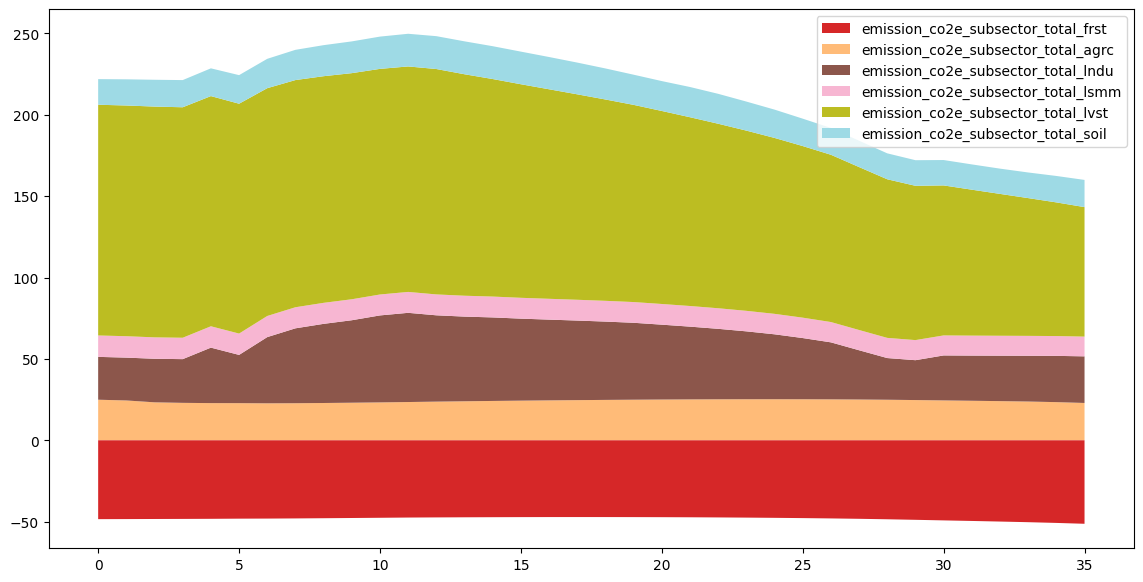

In [131]:
primary_id = 15015

# get AFOLU subsectors to plot
tab = matt.get_subsector_attribute_table().table
subsecs = list(tab[tab["sector"].isin(["AFOLU"])]["abbreviation_subsector"])
fields = [x for x in df_out.columns if "emission_co2e_subsector_total" in x and any([y in x for y in subsecs])]

df_plot = df_out[
    df_out[ssp.key_primary].isin([primary_id])
][fields]


fields = list(df_plot.columns)
fig, ax = plt.subplots(figsize = (14, 7))
cmap = mpl.colormaps["tab20"]
colors = [cmap(x/len(fields)) for x in range(1, len(fields) + 1)]


sup.plot_stack(
    df_plot,
    fields,
    dict_formatting = dict((x, {"color": colors[i] }) for i, x in enumerate(fields)),
    figtuple = (fig, ax),
)

ax.legend(loc = "upper right")

